In [70]:
import pandas as pd
import sklearn as sk
import numpy as np

from sklearn import cross_validation as cv
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve
from sklearn import grid_search
%matplotlib inline

1. Загрузите набор данных Spambase

In [15]:
set_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
names_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names'

df = pd.read_csv(set_url, header=None)

In [16]:
names = pd.read_csv(names_url,skiprows=30)

In [17]:
names_col = pd.DataFrame(names['1'][:].str.split(':').tolist(), columns = ['names', 'cut'])
names_col = names_col.append(pd.DataFrame([['response','fdsf']], columns = ['names', 'cut']))

df.columns = names_col['names']


In [18]:
df.head(5)

names,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,response
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [22]:
Y = df['response']
X = df.ix[:,0:df.shape[1]-1]
Y = Y.values
X = X.values
type(X)

numpy.ndarray

2. Оветьте на следующие воросы:
Сколько примеров писем в датасете?
Какова доля спама?
Какие характерные группы признаков представлены в наборе? Выведите список признаков, внимательно посмотрите на их названия.

In [10]:
df.shape

(4601, 58)

В сете 4601 письмо

In [23]:
sum(df['response'])/df.shape[0]

0.39404477287546186

respone = 1 отмечает спам письма, значит в этом сете 39% спама

В сете 6 групп признаков:
    1. 48 признаков показывают частоту повторения слова в письме. Показывает процент от общего числа слов. Словом в сете считает любую буквено-циферную строку ограниченне не буквенно-циферными символами или концом строки.
    2. 6 признаков показывают частоту повторения символов в письме. Показывает процент от общего числа символов
    3. 1 признак показывает средний размер серий последовательных заглавных букв
    4. 1 признак показывает размер самой длинной серии последовательных заглавных букв
    5. 1 признак показывает общее число заглавных букв в письме.
    6. 1 признак показывает, является ли письмо спамом, если = 1, то является спамом.

3. Подготовьте два разбиения исходного набора данных на тестовую (test) и обучающую (train) выборки:
*Первые 3000 писем отдайте на обучение, а оставшиеся на тест.
*Воспользуйтесь необходимой функцией sklearn и сделайте случайноее разбиение в тех же пропорциях.

In [25]:
train_vol = 3000
Xtrain_w = X[0 : train_vol, ]
Ytrain_w = Y[0 : train_vol, ]

Xtest_w  = X[train_vol : df.shape[0],]
Ytest_w  = Y[train_vol : df.shape[0],]

In [26]:
Xtrain, Xtest, Ytrain, Ytest = sk.cross_validation.train_test_split(X,Y, train_size = train_vol)

4. Для первого из разбиений обучите алгоритм sklearn.tree.DecisionTreeClassifier на обучающей выборке. Смотрите приложение #2

In [27]:
clf = DecisionTreeClassifier()
clf.fit(Xtrain_w, Ytrain_w)

Ypred_test_w = clf.predict(Xtest_w)

5. Замерьте метрики качества recall, precision, f1, accuracy на тестовой выборке из первого разбиения. Используйте соответствующие функции sklearn

In [28]:
#recall
metrics.recall_score(Ytest_w, Ypred_test_w)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [29]:
#precision
metrics.precision_score(Ytest_w, Ypred_test_w)

0.0

In [30]:
#f1
metrics.f1_score(Ytest_w, Ypred_test_w)

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1076: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0

In [31]:
#accuracy
metrics.accuracy_score(Ytest_w, Ypred_test_w)

0.79013116801998751

6. Повторите пункты 4. и 5. для второго разбиения.

In [33]:
clf2 = DecisionTreeClassifier()
clf2.fit(Xtrain, Ytrain)

Ypred_test_clf2 = clf2.predict(Xtest)

In [35]:
#recall
metrics.recall_score(Ytest, Ypred_test_clf2)

0.89409984871406956

In [36]:
#precision
metrics.precision_score(Ytest, Ypred_test_clf2)

0.87296898079763663

In [37]:
#f1
metrics.f1_score(Ytest, Ypred_test_clf2)

0.88340807174887903

In [38]:
#accuracy
metrics.accuracy_score(Ytest, Ypred_test_clf2)

0.90256089943785134

7. Объясните разницу в результатах. Далее используйте только второе (случайное) разбиение.

В тестовой выборке в первом случае нет вообще ни одного спам письма, поэтому метрики recall =0 (true positive в выборке нет), precision нельзя посчитать (т.к. сумма true positive + true negative =0) и т.п.  

8. Для модели, обученной на случайном разбиении, выведите оценку информативности признаков (feature importance).

In [77]:
most_important_features = clf2.feature_importances_
most_important_features_index = np.argsort(most_important_features)[::-1]

feature_names = df.columns[::-1]

for idx in most_important_features_index:
    print ('{} {}, importance = {}'.format(idx, feature_names[idx], most_important_features[idx]))

52 word_freq_over, importance = 0.32784010819795983
6 char_freq_!, importance = 0.15244440824332217
51 word_freq_remove, importance = 0.09923144625810192
24 word_freq_415, importance = 0.054804032101869536
56 word_freq_address, importance = 0.044463673365919956
15 word_freq_original, importance = 0.028262943116484734
54 word_freq_3d, importance = 0.026521123887371194
4 char_freq_#, importance = 0.02406697939832167
45 word_freq_people, importance = 0.019153344380018575
26 word_freq_857, importance = 0.01907625949056859
18 word_freq_direct, importance = 0.01782508007450804
55 word_freq_all, importance = 0.01719408250645311
23 word_freq_85, importance = 0.01439987319049505
20 word_freq_parts, importance = 0.013710856887213551
35 word_freq_000, importance = 0.011478742454220732
44 word_freq_report, importance = 0.011311672962818306
16 word_freq_meeting, importance = 0.010617235318460856
10 word_freq_conference, importance = 0.009116261068559619
49 word_freq_order, importance = 0.0083964247

9. *Объясните способ, которым Решающее Дерево способно дать такую оценку.

10. Обучите модель sklearn.neighbors.KNeighborsClassifier на обучающей выборке и произведите оценку качества модели на тестовой выборке.

In [78]:
knn = neighbors.KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)


knn_pred = knn.predict(Xtest)

In [47]:
#recall
metrics.recall_score(Ytest, knn_pred)

0.68986384266263234

In [48]:
#precision
metrics.precision_score(Ytest, knn_pred)

0.77157360406091369

In [49]:
#f1
metrics.f1_score(Ytest, knn_pred)

0.72843450479233229

In [50]:
#accuracy
metrics.accuracy_score(Ytest, knn_pred)

0.78763272954403496

12. Какая из обученных моделей лучше?
Модель дерева лучше по всем метрикам качества.

13 .Способен ли KNN оценить информативность признаков?

14. Произведите нормировку обучающей и тестовой выборок. *sklearn имеет необходимый функционал, не надо делать это самостоятельно*

In [51]:
Xtrain_norm = preprocessing.normalize(Xtrain)

knn2 = neighbors.KNeighborsClassifier()
knn2.fit(Xtrain_norm, Ytrain)

knn2_pred = knn2.predict(Xtest)

In [52]:
#recall
metrics.recall_score(Ytest, knn2_pred)

0.86232980332829046

In [53]:
#precision
metrics.precision_score(Ytest, knn2_pred)

0.7421875

In [54]:
#f1
metrics.f1_score(Ytest, knn2_pred)

0.79776067179846044

In [55]:
#accuracy
metrics.accuracy_score(Ytest, knn2_pred)

0.81948782011242971

16. Объясните разницу в результатах. KNN использует для определения отнесения письма к классу "многомерное" евклидово расстояние, которое зависит от масштаба величин. Нормировка уравнивает машстаб всех предикторов, что позволяет лучше классифицировать письма.

17. Повторите эксперимент с Решающим Деревом на нормированных данных.

In [56]:
clf_norm = DecisionTreeClassifier()
clf_norm.fit(Xtrain, Ytrain)

Ypred_norm = clf_norm.predict(Xtest)

In [57]:
#recall
metrics.recall_score(Ytest, Ypred_norm)

0.89561270801815429

In [58]:
#precision
metrics.precision_score(Ytest, knn2_pred)

0.7421875

In [59]:
#f1
metrics.f1_score(Ytest, knn2_pred)

0.79776067179846044

In [ ]:
#accuracy
metrics.accuracy_score(Ytest, knn2_pred)

18. Сравните результаты с теми, которые получены на ненормированных данных. Объясните подобное поведение.

19. Пропорции разбиения на данный момент выбраны безосновательно. Найдите оптимальные пропорции разбиения на train и test. Для этого необходимо перебрать значения пропорции разбиения по сетке, для каждого значения сгенерировать большое число разбиений и на каждом посчитать ошибку (с точки зрения выбранной метрики, например, f1), далее строится график зависимости разброса величины ошибки от пропорции разбиения, пропорция разбиения выбирается из области наименьшего разброса ошибки. Выберите метрику и постройте график зависимости стандартного отклонения ошибки от пропорции разбиения.

In [68]:

#Xtrain, Xtest, Ytrain, Ytest = sk.cross_validation.train_test_split(X,Y, train_size = train_vol)
boot = range(100,4600,250)


nboot = range(200)
acc = list(nboot)
acc_table = pd.DataFrame()

clf3 = DecisionTreeClassifier()

for i in range(len(boot)):
    for j in nboot:
        Xbtrain, Xbtest, Ybtrain, Ybtest = sk.cross_validation.train_test_split(X,Y, train_size = boot[i])
        clf3.fit(Xbtrain, Ybtrain)
        Ybpred_test = clf3.predict(Xbtest)
        acc[j] = metrics.accuracy_score(Ybtest,Ybpred_test) 
    acc_table [i] = pd.Series(acc)



In [71]:
acc_table.columns = boot
acc_table.head(5)

,100,350,600,850,1100,1350,1600,1850,2100,2350,2600,2850,3100,3350,3600,3850,4100,4350
0,0.861808,0.818866,0.868783,0.893895,0.884890,0.900338,0.888037,0.906943,0.895242,0.896490,0.888556,0.897773,0.908728,0.906475,0.912088,0.918775,0.940120,0.932271
1,0.800489,0.888262,0.879780,0.882698,0.897744,0.884343,0.886371,0.888041,0.904838,0.900489,0.900050,0.917190,0.918721,0.905675,0.926074,0.902796,0.904192,0.932271
2,0.819818,0.884027,0.869533,0.870968,0.890603,0.893571,0.888704,0.897492,0.901639,0.901377,0.892054,0.901199,0.916056,0.908074,0.921079,0.917443,0.906188,0.924303
3,0.830260,0.846860,0.861285,0.897094,0.886033,0.871424,0.883705,0.896401,0.911635,0.899156,0.893053,0.910337,0.927382,0.925659,0.925075,0.929427,0.918164,0.880478
4,0.871584,0.870619,0.863034,0.883231,0.869466,0.880652,0.894702,0.901490,0.906837,0.902710,0.903048,0.896059,0.911392,0.901679,0.912088,0.913449,0.918164,0.932271


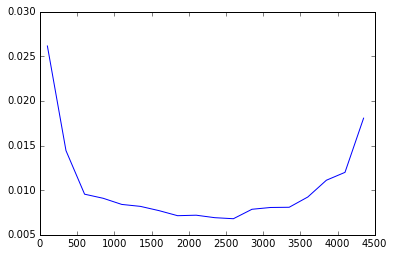

In [72]:
plt.plot( boot,acc_table.std(0))
#plt.plot( boot,acc_table.mean(0))

20. Однократное разбиение выборки на train и test не является достаточно хорошим методом с точки зрения оценки качества моделей. На практике используется многократное разбиение или т.н. Перекрестная Проверка (Cross Validation). Получите оценки качества для дерева и KNN, используя Cross Validation. *Существует несколько типов Cross Validation. Выберите один и обоснуйте свой выбор.*

Я выбрал 10-fold CV. Почему этот метод:

1. Это относительно быстро, в отличие от более затратного leave-one-out, и тем более leave-p-out 
2. Мы включаем в рассмотрение все имеющиеся данные, в отличие от split&shuffle

In [63]:
cv_rez = cv.cross_val_score(DecisionTreeClassifier(),X,Y, scoring='accuracy', cv=10)
cv_rez.mean()
#accuracy score after 10-fold cv

0.90063298667680891

In [61]:
cv_knn_rez = cv.cross_val_score(neighbors.KNeighborsClassifier(),X,Y, scoring='accuracy', cv=10)

cv_knn_rez.mean()
#accuracy score after 10-fold cv

0.78830235389868908

* Для моделей, обученных в предыдущей части постройте ROC и посчтатйте метрику ROC AUC.


In [64]:

YPred_clf2 = clf2.predict(Xtest)

fpr, tpr, thresholds = metrics.roc_curve(Ytest,Ypred_test_clf2)

metrics.roc_auc_score(Ytest,Ypred_test_clf2)

0.90130524350597097

In [65]:
print(fpr,tpr,thresholds)

[ 0.          0.09148936  1.        ] [ 0.          0.89409985  1.        ] [2 1 0]


In [66]:
Ypred_knn = knn.predict(Xtest)

fpr, tpr, thresholds = metrics.roc_curve(Ytest,Ypred_knn)

metrics.roc_auc_score(Ytest,Ypred_knn)

0.77312341069301838

In [67]:
print(fpr,tpr,thresholds)

[ 0.          0.14361702  1.        ] [ 0.          0.68986384  1.        ] [2 1 0]


* Верно ли, что классификаторы из предыдущей части действуют путем сравнения некоторой оценки принадлежности положительному классу с некоторым порогом?

И дерево и KNN дает оценку принадлежности к классу. Пересечение некого порога определеяет, относится ли объект к одному или к другому классу.

* Какой классификатор имеет ROC AUC близкий к 0? 

Это должен быть инвертированный ROC AUC близкий к 1, т.е. когда мы переобозвали "положительный" и "отрицательный" классы. В этом смысле это такой же идеальный классификатор, как и со значением ROC AUC близкому к 1.


На данный момент параметры алгоритмов KNN и Decision Tree выбраны наугад. Для одбора параметров используется т.н. Gree Search (sklearn имеет соответствующий модуль).
 * Найдите оптимальный набор параметров дерева, перебрав значения параметров по сетке. Параметры для настройки: критерий разбиения, максимальная глубина, число признаков для каждого узла, минимальное число объектов в листе.
 
 * Найдите оптимальный набор параметров для KNN, перебрав значения параметров по сетке. Параметры для настройки: число соседей, функция расстояния, схема взвешивания.

In [76]:
crit = list(['Gini', 'entropy'])
max_feat = range(1,57)
max_dep = range(1,50)
min_samp = range(1,100,5)

param_grid = dict(criterion=crit, max_features=max_feat, max_depth = max_dep, min_sample_leaf=min_samp)
param_grid
#grid_search.GridSearchCV(clf, param_grid, cv=10, scoring = 'accuracy')

{'criterion': ['Gini', 'entropy'],
 'max_depth': range(1, 50),
 'max_features': range(1, 57),
 'min_sample_leaf': range(1, 100, 5)}